# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 


<a id='probability'></a>
## Part I - Probability


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# duration of this experiment
df['timestamp'] = pd.to_datetime(df['timestamp'])
max_duration = df.timestamp.max()
min_duration = df.timestamp.min()
duration = max_duration - min_duration
duration

Timedelta('21 days 23:59:49.081927')

In [4]:
n_rows = df.shape[0]
print("Number of rows in the dataset = ", n_rows)

Number of rows in the dataset =  294478


**c.** The number of unique users in the dataset.

In [5]:
uniqe_users = df['user_id'].nunique()
print("The number of unique users in the dataset =", uniqe_users)

print("\nRecords of unique values for each group in the dataset: \n")
unique = df.groupby(['group']).nunique()
print(unique)

The number of unique users in the dataset = 290584

Records of unique values for each group in the dataset: 

           user_id  timestamp  group  landing_page  converted
group                                                        
control     146195     147202      1             2          2
treatment   146284     147276      1             2          2


**d.** The proportion of users converted.

In [6]:
prop_converted = df['converted'].mean()
print("The proportion of users converted = ", prop_converted)

The proportion of users converted =  0.119659193556


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [7]:
n_times = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]
print("Answer is ", n_times)

Answer is  3893


**f.** Do any of the rows have missing values?

In [8]:
df.isna().sum().sum()

0

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.loc[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]

In [10]:
# Double Check all of the incorrect rows were removed from df2 
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [11]:
df2.head()
unique_users2 = df2['user_id'].nunique()
print("There are {} unique user ids.".format(unique_users2))

print("\nRecords of unique values for each group in the dataset2: \n")
unique2 = df2.groupby(['group']).nunique()
print(unique2)

There are 290584 unique user ids.

Records of unique values for each group in the dataset2: 

           user_id  timestamp  group  landing_page  converted
group                                                        
control     145274     145274      1             1          2
treatment   145310     145311      1             1          2


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(['user_id'])].iloc[:, 0]

2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [13]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [14]:
# Remove one of the rows with a duplicate user_id.

df2.drop([2893], axis = 0, inplace=True)

#df2.loc[2893, :]
df2[df2['user_id']== 773192]

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [15]:
df2.head()
population = df2.converted.mean()
print("The probability of an individual converting regardless of the page they receive = ", population)

The probability of an individual converting regardless of the page they receive =  0.119597087245


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
control = df2.query("group == 'control'")['converted'].mean()
print("Answer is ", control)

Answer is  0.1203863045


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
experiment = df2.query("group == 'treatment'")['converted'].mean()
print("Answer is ", experiment)

Answer is  0.118808065515


In [18]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = experiment - control
print("Difference between conversion rates = ", obs_diff)

Difference between conversion rates =  -0.00157823898536


**d.** What is the probability that an individual received the new page?

In [19]:
page_mean = len(df2[df2['landing_page']=='new_page'])/df2.shape[0]
print("Answer is ", page_mean)

Answer is  0.5000619442226688


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**Your answer goes here.**

The negative value from computing the observed difference in conversion rates depicts that, the new treatment group users do not lead to more conversions than the control group. Thus, the old control group users lead to .158% more conversions.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**Put your answer here.**

Null Hypothesis = new page - old page <= 0 & Alternative Hypothesis = new page - old page > 0

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [20]:
p_new = df2.converted.mean()
print("The conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis = ", p_new)

The conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis =  0.119597087245


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [21]:
p_old = df2.converted.mean()
print("The conversion rate for  𝑝𝑜𝑙𝑑  under the null hypothesis = ", p_old)

The conversion rate for  𝑝𝑜𝑙𝑑  under the null hypothesis =  0.119597087245


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [22]:
df2.groupby(['group']).count()
n_new = df2[df2['group']== 'treatment'].shape[0]
print("Answer is ", n_new)

Answer is  145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [23]:
df2.groupby(['group']).count()
n_old = df2[df2['group']== 'control'].shape[0] 
print("Answer is ", n_old)

Answer is  145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [24]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], n_new, p=(1-p_new, p_new), replace = True)
new_page_converted = np.array(new_page_converted)
pnew2 = new_page_converted.mean()
pnew2

0.11997109627692519

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [25]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0,1], n_old, p=(1-p_old, p_old), replace = True)
old_page_converted = np.array(old_page_converted)
pold2 = old_page_converted.mean()
pold2

0.1196291146385451

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [26]:
conv_diff = pnew2 - pold2
conv_diff

0.00034198163838008999


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [27]:
# Sampling distribution 
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1], n_new, p=(1-p_new, p_new), replace = True)
    pnew2 = new_page_converted.mean()
    old_page_converted = np.random.choice([0,1], n_old, p=(1-p_old, p_old), replace = True)
    pold2 = old_page_converted.mean()
    p_diffs.append(pnew2 - pold2)
    
p_diffs = np.array(p_diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

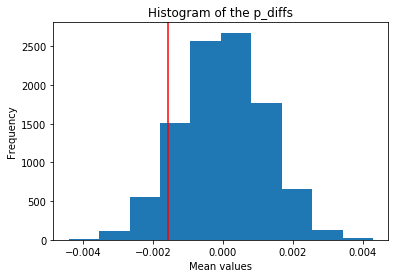

In [28]:
plt.hist(p_diffs);
plt.axvline(obs_diff, c = 'r');
plt.title('Histogram of the p_diffs');
plt.xlabel('Mean values');
plt.ylabel('Frequency');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [29]:
p_value = (p_diffs > obs_diff).mean() 
p_value


0.90449999999999997

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)".

>**Put your answer here.**

The p-value computed above is to test the statistical significance of the actual difference observed which we saved as (obs_diff). Given our null hypothesis is true, the p-value computes the probability of the obs_diff occurring or one even more in favor of the alternative hypothesis. Here, our p-value covers more than 50% of our distribution.

The value is called the P-value

With a p-value greater than our type 1 error rate of 0.05, we can conclude a statistical significance in favour of our null hypothesis (Null Hypothesis = new page - old page <= 0). so therefore, we fail to reject the null hypothesis. The results suggests keeping the old page because it has a higher conversion rate.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [30]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2.query("group == 'control' & converted == '1'"))

# number of conversions with the new_page
convert_new = len(df2.query("group == 'treatment' & converted == '1'"))

# number of individuals who were shown the old_page
n_old = len(df2[df2['landing_page']=='old_page'])

# number of individuals who received new_page
n_new = len(df2[df2['landing_page']=='new_page'])

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

In [34]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Put your answer here.**

To start with, my hypothesis is a right-tailed test since the symbol in the alternative hypothesis is “ > ”. From the ztable, a critical value at 95% confidence interval (𝑍0.05) has a value of 1.645. Based on this value, we can create a rejection region as [1.645, (+)infinity]. The above computed Zscore of value  -1.311 falls outside our rejection region. The condition given is:  
"reject null if  𝑍𝑠𝑐𝑜𝑟𝑒  >  𝑍𝛼". 

Since our test statistic falls outside the rejection region, we decide to fail to reject the null hypothesis.  
We can therefore conclude that: The data provide sufficient evidence, at a 95%  level of confidence, that the old page has a higher conversion rate.

Again, with a p−value (0.905) > α (0.05), the decision is to fail to reject the null hypothesis.

Therefore, the data provide sufficient evidence, at a 5%  level of significance, to conclude that the conversion rate at the old page is higher than at the new page.

NB: Main source of reference is the resources provided in the description section above.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Put your answer here.**

A logistic regression since we want to predict a categorical outcome (conversion or no conversion) and produce an output between 0 and 1.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [35]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2['intercept'] = 1
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [36]:
import statsmodels.api as sm
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-26 23:07 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [38]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [39]:
1/np.exp(results.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

In [40]:
df2.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

>**Put your answer here.**

Firstly, our categorical reference here is conversion with which we compare the explanatory variables to determine the probability of their occurence, that is, whether more or less likely to occur.

In a logistic regression, we hypothesize that;
null hypothesis: beta coefficient = zero or
none of the explanatory variables have a statistically significant relationship with the response variable and the opposite is true for alternative hypothesis.

alternative hypothesis: beta coefficient != zero.

The page-type (treatment) is not statistically significant for predicting conversion given that it has a 0.1899 p-value. With the p-value greater than our type I error rate (0.05), we continue to fail to reject the null hypothesis. Our p-value differs from the previous values because of the logit link function in our model and the several aspects of analysis.

The result can be interpreted as follows: 
If an individual received an old page, they are .99 times more likely to convert than if they received a new page. the treatment is associated with a decreasing conversion rate.

In [ ]:
References: https://www.statisticssolutions.com/logistic-regression/#:~:text=A%20Null%20hypothesis%3A%20null%20hypothesis,variable(s)%20be%20linear.
            https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/binary-logistic-regression/interpret-the-results/key-results/
            https://www.statology.org/null-hypothesis-of-logistic-regression/

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Put your answer here.**

Adding additional terms into a regression model allows one to look at the interaction between explanatory variables and how they may or may not change the response. One disadvantage to adding additional terms into a regression model is with respect to the dependency of the explanatory variables on each other (multicollinearity). Multicollinearity produce misleading results.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [41]:
# Read the countries.csv
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [42]:
# Join with the df2 dataframe
df_merged = pd.merge(df2, df_country, on='user_id')
df_merged.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US


In [43]:
# Create the necessary dummy variables
#df_merged.info()
#df_merged.country.unique()
df_merged[['US', 'CA', 'UK']] = pd.get_dummies(df_merged['country'])
df_merged.head()

logit_mod2 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'US', 'UK']])
results2 = logit_mod2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-26 23:09 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9868    0.0114  -174.1736  0.0000  -2.0092  -1.9645
US           -0.0507    0.0284    -1.7863  0.0740  -0.1064   0.0049
UK           -0.0099    0.0133    -0.7458  0.4558  -0.0360   0.0161
==================================================================

"""

In [44]:
np.exp(results2.params)

intercept    0.137132
US           0.950546
UK           0.990133
dtype: float64

In [45]:
1/np.exp(results2.params)

intercept    7.292253
US           1.052027
UK           1.009966
dtype: float64

In [46]:
df_merged.groupby('country').mean()['converted']

country
CA    0.115318
UK    0.120594
US    0.119547
Name: converted, dtype: float64

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [47]:
# Fit your model, and summarize the results
df_merged['US_ab_page'] = df_merged['US'] * df_merged['ab_page']
df_merged['UK_ab_page'] = df_merged['UK'] * df_merged['ab_page']
logit_mod3 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'US', 'UK', 'US_ab_page', 'UK_ab_page']])
results3 = logit_mod3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-26 23:17 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
US           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
UK            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
US_ab_page   -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
UK_ab_page   -0.0314    0.0266    -1.1807  0.2377  -0.0835   0.0207
==================================================================

"""

In [48]:
m = np.exp(results3.params)
m

intercept     0.136392
ab_page       1.010893
US            0.988285
UK            1.005761
US_ab_page    0.924703
UK_ab_page    0.969090
dtype: float64

In [49]:
1/m

intercept     7.331806
ab_page       0.989224
US            1.011854
UK            0.994272
US_ab_page    1.081428
UK_ab_page    1.031896
dtype: float64

>**Put your conclusion answer here.**

We can interpret our results in summary3 as follows:

Holding everything else constant, conversion is 1.00 more likely to occur in CA than in UK.
Holding everything else constant, conversion is 0.99 more likely to occur in CA than in US.
Holding everything else constant, conversion is 1.01 more likely to occur in a control group than in a treatment group.

Interaction between the countries and the page and how this affects conversion rate reads as follows:
Holding everything else constant, conversion is 0.92 more likely to occur in CA and recieving the new page than in US and receiving the new page.

Holding everything else constant, conversion is 0.97 more likely to occur in CA and recieving the new page than in UK and receiving the new page.

All the p-values in my summary 3 do not show statistical significance of the explanatory variables for predicting conversion rates as the p-values are > than 0.05. This further provides evidence upon which to decide that, we fail to reject the null hypothesis.


In sum, the experiment was run for about 21 days which is not enough to account for change aversion and novelty effect for example. The experiment needs to run longer not to make a misleading decision.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0